In [15]:
import pandas as pd
import os
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import geopandas as gpd
import logging
import matplotlib.pyplot as plt
from shapely.ops import unary_union, polygonize
from scipy.spatial import Delaunay
import numpy as np
import math
from descartes import PolygonPatch
import shapely.geometry as geometry
import pylab as pl
from shapely.geometry import MultiPoint

In [16]:
os.chdir('C:/Users/zacha/Documents/GitHub/plymouth-university-proj518/data')
print(os.getcwd())

C:\Users\zacha\Documents\GitHub\plymouth-university-proj518\data


In [17]:
file = 'UKHO ADMIRALTY bathymetry UK east coast.csv'
admiralty_df = pd.read_csv(file, sep=',')
admiralty_df = admiralty_df[admiralty_df['Depth'] > -40]

coords = admiralty_df[['Lon', 'Lat']]
coords = coords.to_numpy()

In [18]:
major_polygon = MultiPoint(coords)

C:\Users\zacha\AppData\Local\Temp\ipykernel_27360\4211619081.py:4: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for p in major_polygon:
c:\Users\zacha\miniconda3\envs\geo\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


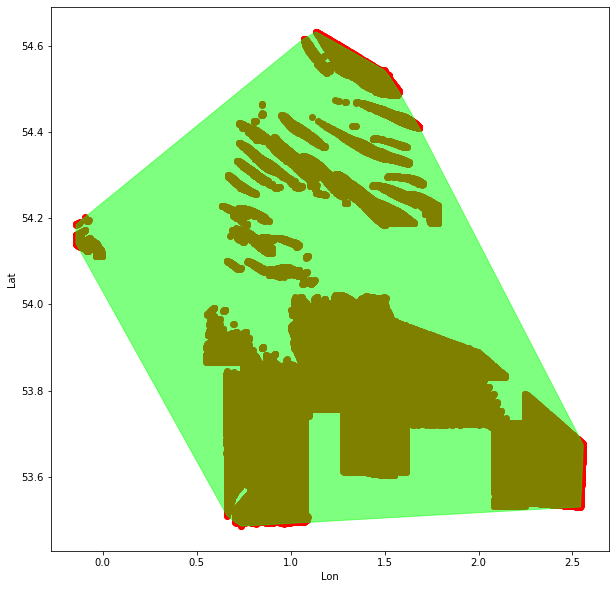

In [21]:
fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

for p in major_polygon:
    ax.plot(p.x, p.y, 'o', color='#ff0000')

ax.set_xlabel("Lon")
ax.set_ylabel("Lat")

minor_polygon = major_polygon.convex_hull
patch1 = PolygonPatch(minor_polygon, facecolor='#00ff00', edgecolor='#00ff00', alpha=0.5, zorder=2)
ax.add_patch(patch1)

plt.show()
